# _Weather Long-term Time Series Forecasting_ (Kaggle)

***Origen de datos:** [Kaggle Dataset](https://www.kaggle.com/datasets/alistairking/weather-long-term-time-series-forecasting)*

**Descripción del Dataset**

El clima se registra cada 10 minutos a lo largo de todo el **año 2020**, y comprende **20 indicadores meteorológicos** medidos en una estación climática del **Instituto Max Planck**. El conjunto de datos proporciona mediciones atmosféricas exhaustivas que incluyen la temperatura del aire, la humedad, los patrones de viento, la radiación y la precipitación.

Con más de **52.560 puntos de datos** por variable (*365 días × 24 horas × 6 mediciones por hora*), este muestreo de alta frecuencia ofrece información detallada sobre los patrones climáticos y las condiciones atmosféricas. Las mediciones incluyen tanto parámetros meteorológicos básicos como cantidades derivadas como el déficit de presión de vapor y la temperatura potencial, lo que lo hace adecuado tanto para la investigación meteorológica como para aplicaciones prácticas.

| Columna | Descripción | Unidad |
| :--- | :---  | :---  |
| **date** | Fecha y hora de la observación. | DateTime |
| **p** | Presión atmosférica. | milibares (mbar) |
| **T** | Temperatura del aire. | grados Celsius (°C) |
| **Tpot** | Temperatura potencial (temperatura que tendría una parcela de aire si se moviera a un nivel de presión estándar). | Kelvin (K) |
| **Tdew** | Temperatura de punto de rocío (temperatura a la que el aire se satura con humedad). | grados Celsius (°C) |
| **rh** | Humedad relativa (cantidad de humedad en el aire respecto al máximo que puede contener a esa temperatura). | porcentaje (%) |
| **VPmax** | Presión de vapor máxima (presión máxima ejercida por el vapor de agua a la temperatura dada). | milibares (mbar) |
| **VPact** | Presión de vapor actual (presión de vapor de agua actual en el aire). | milibares (mbar) |
| **VPdef** | Déficit de presión de vapor (diferencia entre VPmax y VPact, utilizado para medir el potencial de secado). | milibares (mbar) |
| **sh** | Humedad específica (masa de vapor de agua por kilogramo de aire). | gramos por kilogramo (g/kg) |
| **H2OC** | Concentración de vapor de agua. | milimoles por mol (mmol/mol) de aire seco |
| **rho** | Densidad del aire (masa de aire por unidad de volumen). | gramos por metro cúbico (g/m³) |
| **wv** | Velocidad del viento. | metros por segundo (m/s) |
| **max. wv** | Velocidad máxima del viento registrada durante el periodo. | metros por segundo (m/s) |
| **wd** | Dirección del viento (dirección desde la que sopla el viento). | grados (°) |
| **rain** | Lluvia total caída. | milímetros (mm) |
| **raining** | Duración de la precipitación. | segundos (s) |
| **SWDR** | Radiación de onda corta descendente (radiación solar entrante). | vatios por metro cuadrado (W/m²) |
| **PAR** | Radiación fotosintéticamente activa (cantidad de luz disponible para la fotosíntesis). | micromoles por metro cuadrado por segundo (µmol/m²/s) |
| **max. PAR** | Máxima radiación fotosintéticamente activa registrada en el período. | µmol/m²/s |
| **Tlog** | Temperatura registrada (potencialmente de un sensor secundario o registrador). | grados Celsius (°C) |
| **OT** | Puede referirse a "Operational Timestamp" (Marca de tiempo operacional) o desplazamiento de tiempo; requiere clarificación contextual. | N/A |

### Importación del dataset

In [ ]:
#!pip install pandas numpy matplotlib seaborn statsmodels

In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [92]:
# Configuraciones de visualización
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', figsize=(16, 6))
plt.rc('font', size=14)

In [93]:
# Alternativamente, importación local
df = pd.read_csv(f"./cleaned_weather.csv")
df_path = ""

In [94]:
df.set_index('date', inplace=True)

In [95]:
df.head()

p     T    Tpot  Tdew    rh  VPmax  VPact  VPdef  \
date                                                                          
2020-01-01 00:10:00  1008.89  0.71  273.18 -1.33  86.1   6.43   5.54   0.89   
2020-01-01 00:20:00  1008.76  0.75  273.22 -1.44  85.2   6.45   5.49   0.95   
2020-01-01 00:30:00  1008.66  0.73  273.21 -1.48  85.1   6.44   5.48   0.96   
2020-01-01 00:40:00  1008.64  0.37  272.86 -1.64  86.3   6.27   5.41   0.86   
2020-01-01 00:50:00  1008.61  0.33  272.82 -1.50  87.4   6.26   5.47   0.79   

                       sh  H2OC      rho    wv  max. wv     wd  rain  raining  \
date                                                                            
2020-01-01 00:10:00  3.42  5.49  1280.62  1.02     1.60  224.3   0.0      0.0   
2020-01-01 00:20:00  3.39  5.45  1280.33  0.43     0.84  206.8   0.0      0.0   
2020-01-01 00:30:00  3.39  5.43  1280.29  0.61     1.48  197.1   0.0      0.0   
2020-01-01 00:40:00  3.35  5.37  1281.97  1.11     1.48  206.4   0.0      0.0   
2020-01-01 00:50:00  3.38  5.42  1282.08  0.49     1.40  209.6   0.0      0.0   

                     SWDR  PAR  max. PAR   Tlog  
date                                             
2020-01-01 00:10:00   0.0  0.0       0.0  11.45  
2020-01-01 00:20:00   0.0  0.0       0.0  11.51  
2020-01-01 00:30:00   0.0  0.0       0.0  11.60  
2020-01-01 00:40:00   0.0  0.0       0.0  11.70  
2020-01-01 00:50:00   0.0  0.0       0.0  11.81

# Análisis Exploratorio (EDA)

## Reconocimiento de features

In [96]:
df.columns

Index(['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC',
       'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR',
       'max. PAR', 'Tlog'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52696 entries, 2020-01-01 00:10:00 to 2021-01-01 00:00:00
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p         52696 non-null  float64
 1   T         52696 non-null  float64
 2   Tpot      52696 non-null  float64
 3   Tdew      52696 non-null  float64
 4   rh        52696 non-null  float64
 5   VPmax     52696 non-null  float64
 6   VPact     52696 non-null  float64
 7   VPdef     52696 non-null  float64
 8   sh        52696 non-null  float64
 9   H2OC      52696 non-null  float64
 10  rho       52696 non-null  float64
 11  wv        52696 non-null  float64
 12  max. wv   52696 non-null  float64
 13  wd        52696 non-null  float64
 14  rain      52696 non-null  float64
 15  raining   52696 non-null  float64
 16  SWDR      52696 non-null  float64
 17  PAR       52696 non-null  float64
 18  max. PAR  52696 non-null  float64
 19  Tlog      52696 non-null  float64
dtypes

In [50]:
print(f"Los registros comprenden todas las fechas entre {min(df.index)} y {max(df.index)}")

Los registros comprenden todas las fechas entre 2020-01-01 00:10:00 y 2021-01-01 00:00:00


Son mediciones regulares tomadas a intervalos de 10 min.

In [51]:
df.describe().T

count         mean         std      min        25%      50%  \
p         52696.0   989.989233    9.207149   955.58   984.8000   990.92   
T         52696.0    10.818241    7.468671    -6.44     4.5900    10.23   
Tpot      52696.0   284.796938    7.616995   266.19   278.5500   284.32   
Tdew      52696.0     5.409105    5.956722   -13.81     0.7775     5.26   
rh        52696.0    72.487133   19.230260    21.16    58.8200    75.40   
VPmax     52696.0    14.487046    7.632960     3.77     8.4800    12.48   
VPact     52696.0     9.676828    4.023504     2.09     6.4600     8.89   
VPdef     52696.0     4.810131    5.539320     0.00     1.1700     2.74   
sh        52696.0     6.111159    2.561536     1.30     4.0700     5.61   
H2OC      52696.0     9.782341    4.082684     2.09     6.5300     8.99   
rho       52696.0  1210.882855   36.430222  1107.38  1183.9000  1210.80   
wv        52696.0     1.995935   43.596931 -9999.00     1.0000     1.77   
max. wv   52696.0     3.632807    2.462467     0.00     1.7700     3.00   
wd        52696.0   176.850276   81.194840     0.00   141.1000   195.50   
rain      52696.0     0.011773    0.123289     0.00     0.0000     0.00   
raining   52696.0    25.907469  111.503420     0.00     0.0000     0.00   
SWDR      52696.0   131.331822  215.735116     0.00     0.0000     2.82   
PAR       52696.0   259.863438  422.786515     0.00     0.0000     9.67   
max. PAR  52696.0   308.601939  569.956762 -9999.00     0.0000    13.12   
Tlog      52696.0    21.515206    7.790620     6.90    15.2400    20.44   

                75%      max  
p          995.9300  1020.07  
T           16.1800    34.80  
Tpot       290.2600   309.13  
Tdew         9.7000    20.50  
rh          87.9000   100.00  
VPmax       18.4200    55.67  
VPact       12.0500    24.16  
VPdef        6.4400    42.10  
sh           7.6200    15.40  
H2OC        12.2000    24.53  
rho       1236.5500  1318.52  
wv           2.9200    13.77  
max. wv      4.8500    22.90  
wd         226.7000   360.00  
rain         0.0000    11.20  
raining      0.0000   600.00  
SWDR       182.9000  1115.29  
PAR        366.4375  2131.76  
max. PAR   434.2600  2498.94  
Tlog        26.8225    49.09

In [52]:
# Add derived time features
df.index = pd.to_datetime(df.index)
df['hour'] = df.index.hour
df['month'] = df.index.month
df['day'] = df.index.day

In [53]:
def analyze_extreme_events(df):
    """
    Identify and analyze extreme weather events
    """
    extremes = {
        'highest_temp': df['T'].max(),
        'lowest_temp': df['T'].min(),
        'highest_wind': df['wv'].max(),
        'max_daily_rain': df.resample('D')['rain'].sum().max(),
        'hottest_day': df.resample('D')['T'].mean().idxmax(),
        'coldest_day': df.resample('D')['T'].mean().idxmin(),
        'wind_direction': df.groupby('wd')['wv'].count().idxmax()
    }
    
    return extremes

# Extreme events
print("\nEventos extremos:")
extremes = analyze_extreme_events(df)
for event, value in extremes.items():
    print(f"- {event}: {value}")


Eventos extremos:
- highest_temp: 34.8
- lowest_temp: -6.44
- highest_wind: 13.77
- max_daily_rain: 46.4
- hottest_day: 2020-08-08 00:00:00
- coldest_day: 2020-01-25 00:00:00
- wind_direction: 210.3


### Observaciones
#### 1. Características Climáticas Generales

El conjunto de datos, con 52.696 registros, cubre un amplio rango estacional:

* **Temperatura (`T`)**: La temperatura promedio es de 10.82°C, con un rango muy amplio que abarca desde temperaturas bajo cero (mínimo: -6.44 °C) hasta temperaturas elevadas (máximo: 34.80 °C), lo que es coherente con un registro continuo de un año o más.
* **Humedad (`rh`)**: La humedad relativa es **generalmente alta**, con una media del 72.49% y una mediana (percentil 50) aún mayor, del 75.4%. El registro alcanza el 100%, indicando periodos de saturación completa.
* **Presión (`p`)**: La presión atmosférica es relativamente **estable**, con una media de 989.99 hPa y una baja desviación estándar (9.21), lo que podría corresponder a una estación meteorológica a una altitud moderada.

#### 2. Condiciones de Precipitación y Viento

* **Precipitación (`rain`)**: El 75% de los períodos de muestreo registraron **cero lluvia** (percentil 75 en 0). Esto implica que, aunque se registraron eventos de lluvia (máximo de 11.20), el período general de muestreo es **predominantemente seco** o la lluvia es un evento poco frecuente.
* **Radiación Día/Noche (`SWDR` y `PAR`)**: Las variables de radiación tienen una mediana muy cercana a cero (SWDR mediana 2.82), pero máximos muy altos (1115.29 y 2131.76). Este patrón es una clara evidencia de que el conjunto de datos incluye una **mezcla significativa de mediciones nocturnas y diurnas**.
* **Dirección del Viento (`wd`)**: Los vientos dominantes tienen una dirección promedio cercana al 177 ° (Sur), con una dispersión amplia (rango de 0.00° a 360.00°).

#### 3. Indicadores de Calidad de Datos (Valores Atípicos/Errores)

Los datos presentan códigos de error que requieren tratamiento, identificados por el valor **-9999.00**:

* **Velocidad del Viento (`wv`)**: El valor mínimo de **-9999.00** es un código de error o valor faltante. Este dato ha distorsionado gravemente la desviación estándar (43.60), haciendo que el cálculo de la media (2.00) no sea representativo.
* **Radiación PAR Máxima (`max. PAR`)**: Presenta el mismo valor mínimo de **-9999.00**, indicando un problema similar de calidad de datos en esta columna.

Es crucial **filtrar o imputar** estos registros si se desea utilizar esos datos.

## Estudio de la Distribución

In [ ]:
# Durante el análisis de la distribución se aplicó Downsampling Diario (6:1)
# Esto se hizo con el objetivo de poder ver las series de tiempo sin tanto ruido
df_daily = df.resample('D').mean()

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_32631/3977133204.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='T', ax=ax1, palette='Set2')


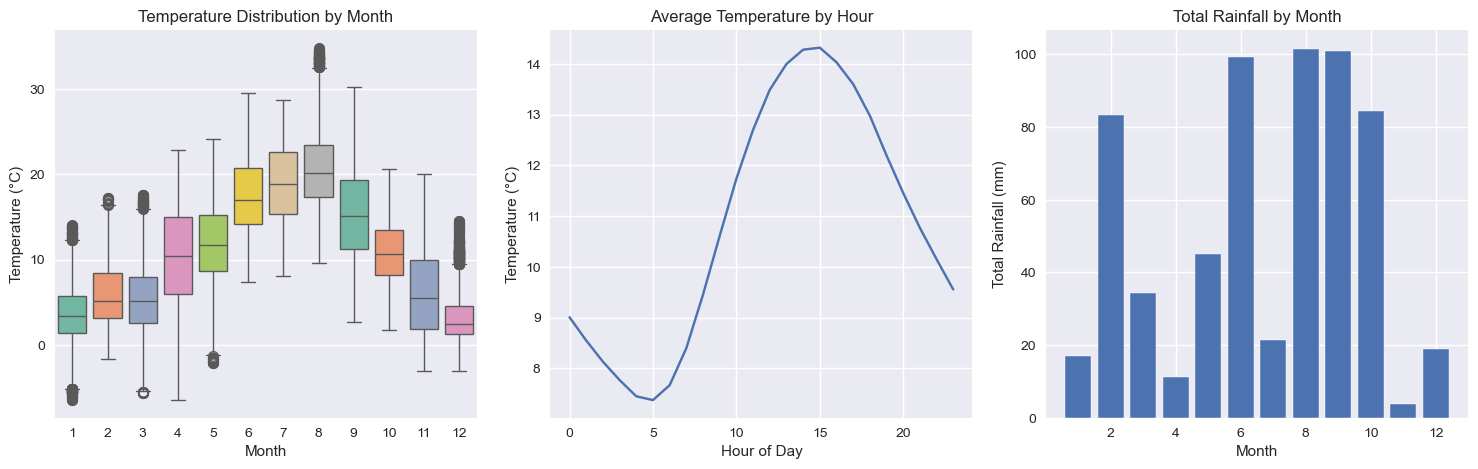

In [55]:
def plot_weather_patterns(df):
    """
    Create visualizations of weather patterns
    """
    plt.style.use('seaborn-v0_8')
    
    # Create main figure with three subplots
    fig = plt.figure(figsize=(15, 9))
    
    # Temperature variation by month
    ax1 = plt.subplot(231)
    sns.boxplot(data=df, x='month', y='T', ax=ax1, palette='Set2')
    ax1.set_title('Temperature Distribution by Month')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Temperature (°C)')
    
    # Daily temperature pattern
    ax2 = plt.subplot(232)
    hourly_temp = df.groupby('hour')['T'].mean()
    ax2.plot(hourly_temp.index, hourly_temp.values)
    ax2.set_title('Average Temperature by Hour')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Temperature (°C)')
    
    # Rainfall pattern by month
    ax3 = plt.subplot(233)
    monthly_rain = df.groupby('month')['rain'].sum()
    ax3.bar(monthly_rain.index, monthly_rain.values)
    ax3.set_title('Total Rainfall by Month')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Total Rainfall (mm)')
        
    plt.tight_layout()
    return fig

    
# Create and save plots
fig = plot_weather_patterns(df)

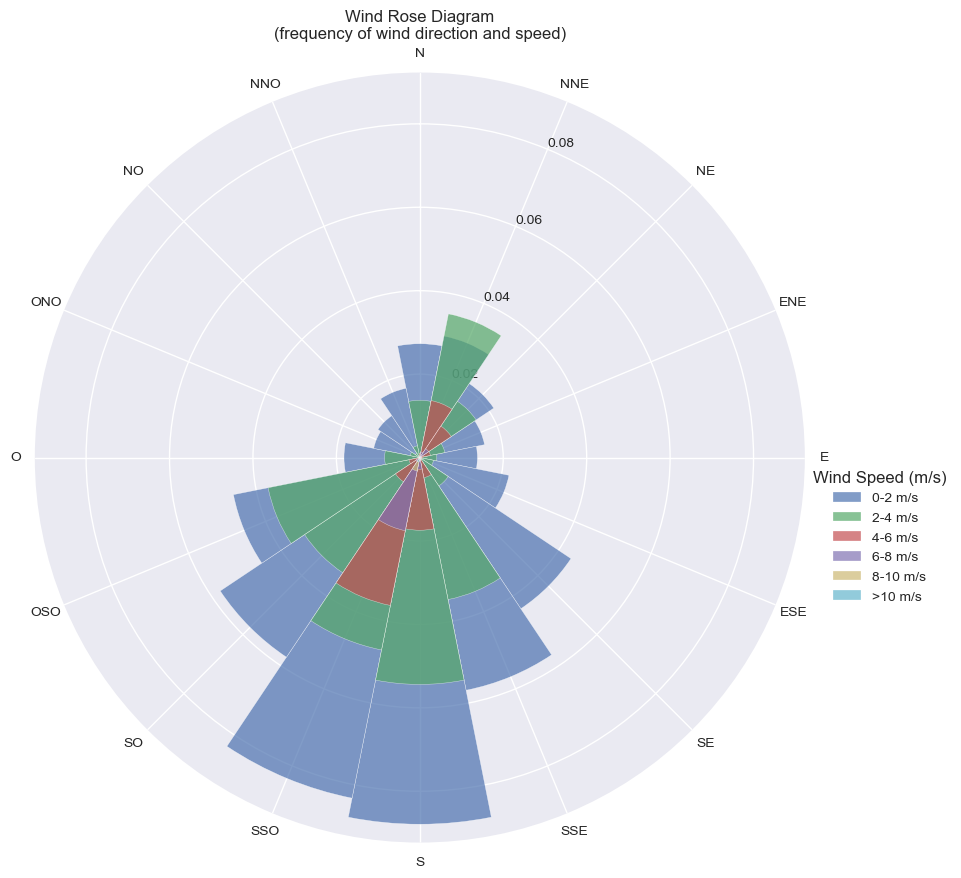

In [56]:
def create_wind_rose(df_in):
    """
    Create a wind rose diagram
    """
    df = df_in.copy()
    # Convert wind directions to radians
    wd_rad = np.radians(df['wd'])
    
    # Define wind speed bins
    speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
    
    # Create direction bins (16 compass directions)
    dir_bins = np.linspace(0, 2*np.pi, 17)
    dir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                 'S', 'SSO', 'SO', 'OSO', 'O', 'ONO', 'NO', 'NNO']
    
    # Categorize wind speeds
    df['speed_cat'] = pd.cut(df['wv'], bins=speed_bins, labels=speed_labels)
    
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    
    # Plot each speed category
    for speed_label in speed_labels:
        mask = df['speed_cat'] == speed_label
        if mask.any():
            hist, _ = np.histogram(wd_rad[mask], bins=dir_bins)
            hist = hist / len(df)  # Convert to frequency
            width = dir_bins[1] - dir_bins[0]
            ax.bar(dir_bins[:-1], hist, width=width, bottom=0.0, 
                  label=f'{speed_label} m/s', alpha=0.7)
    
    # Customize the plot
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_thetagrids(np.degrees(dir_bins[:-1]), dir_labels)
    ax.set_title('Wind Rose Diagram\n(frequency of wind direction and speed)')
    plt.legend(title='Wind Speed (m/s)', bbox_to_anchor=(1.2, 0.5))
    
    return fig
    
# Create separate wind rose plot
wind_rose_fig = create_wind_rose(df)

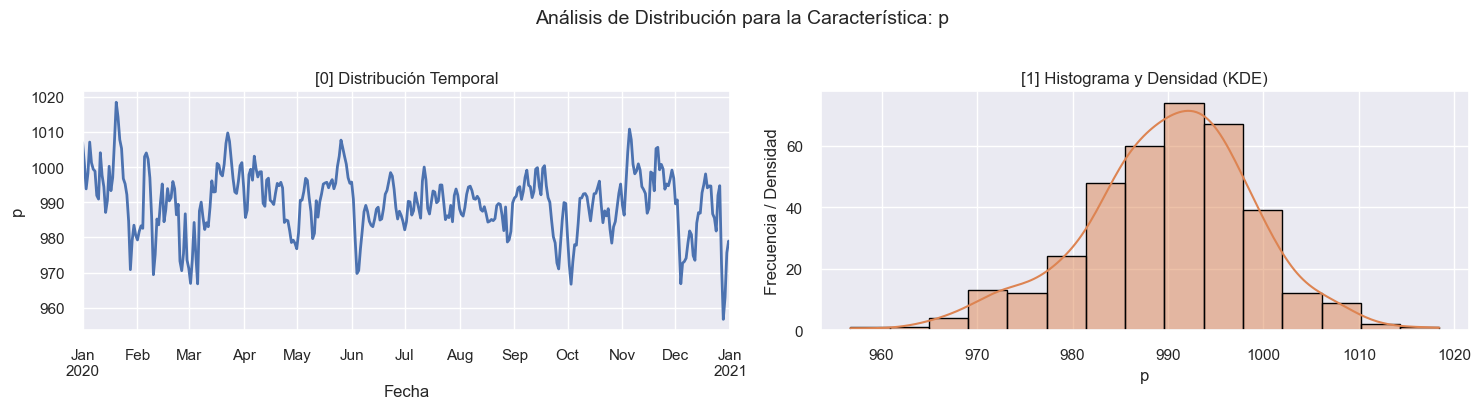

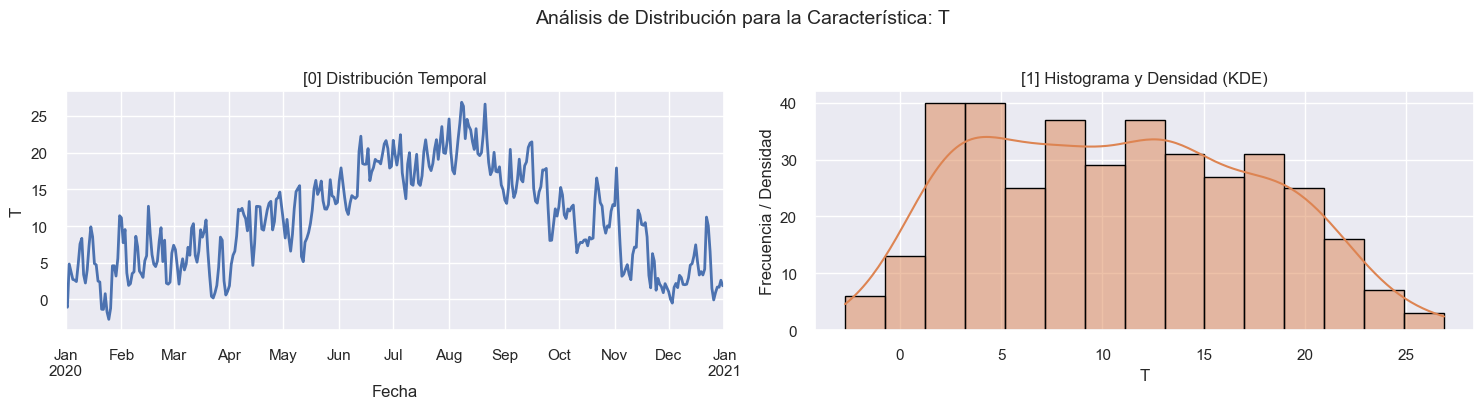

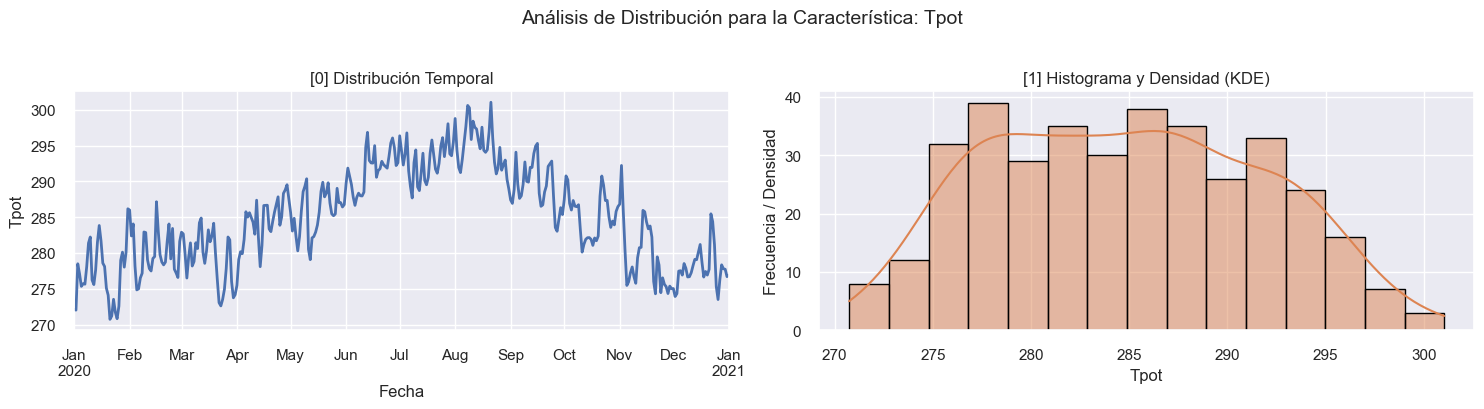

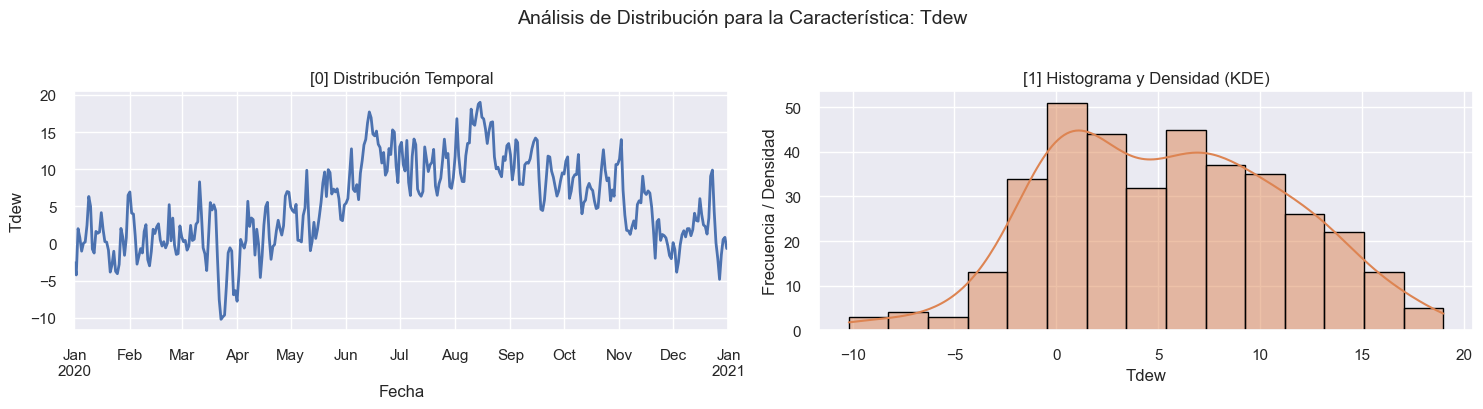

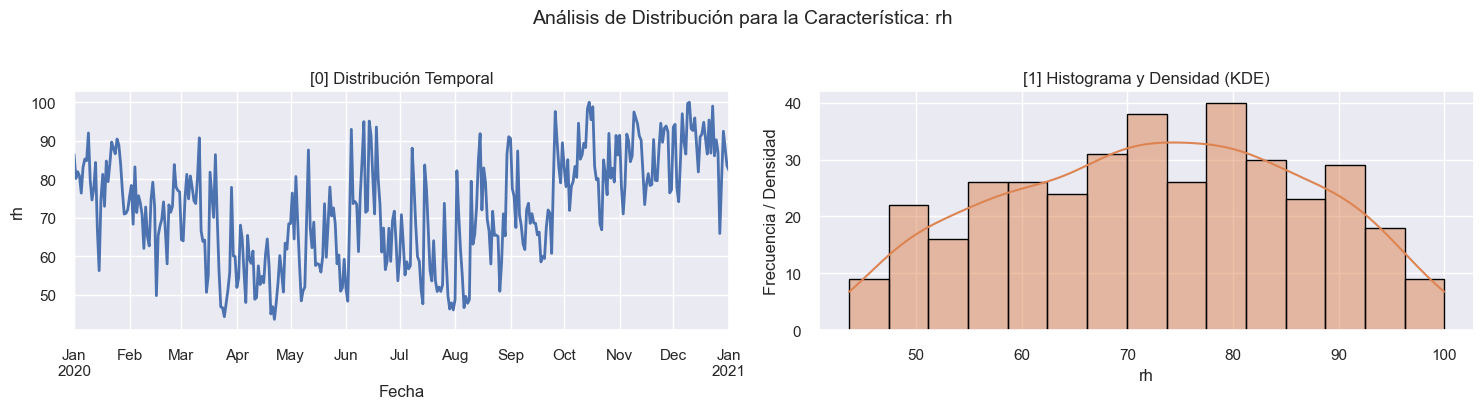

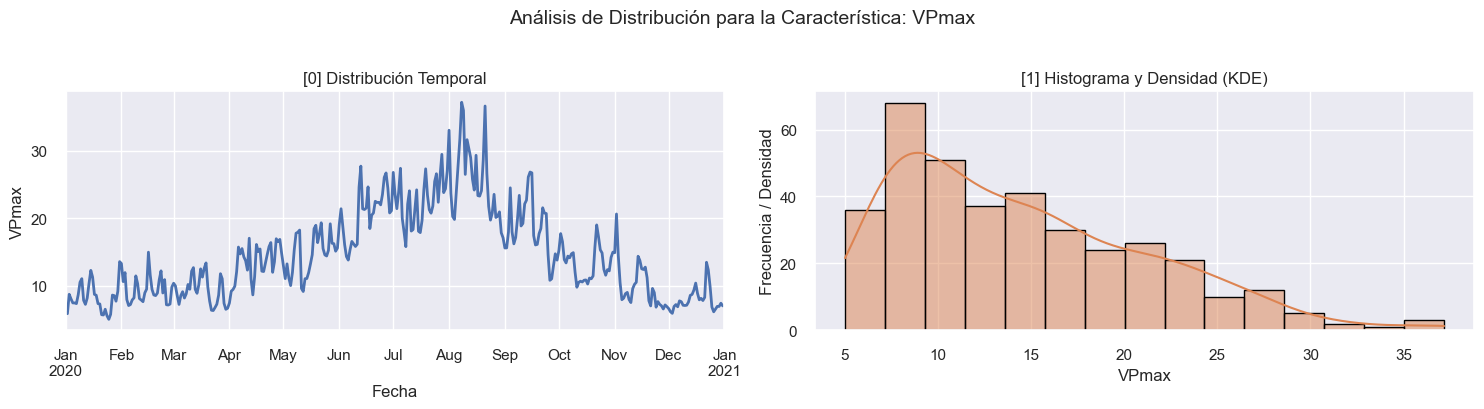

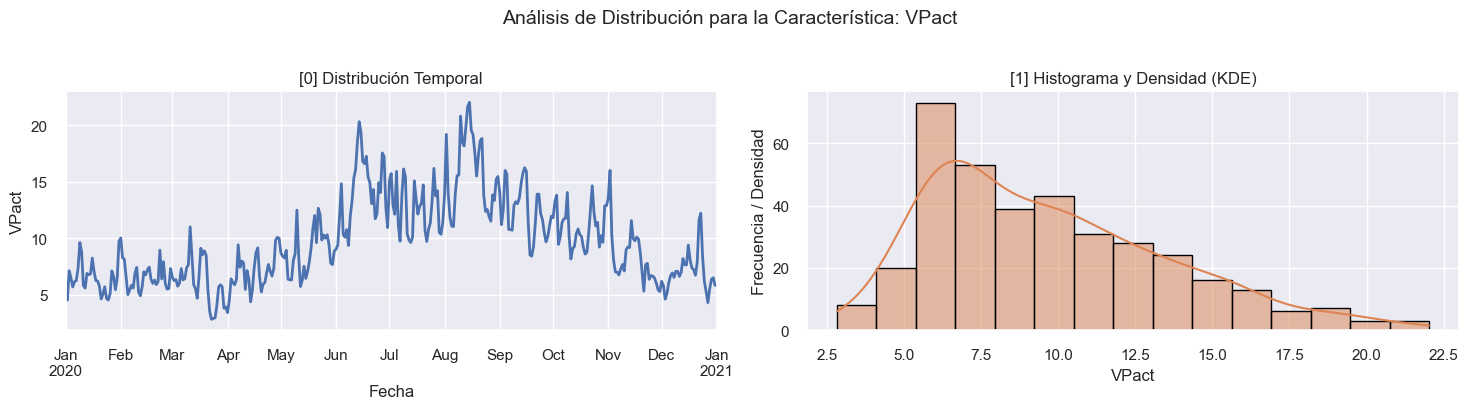

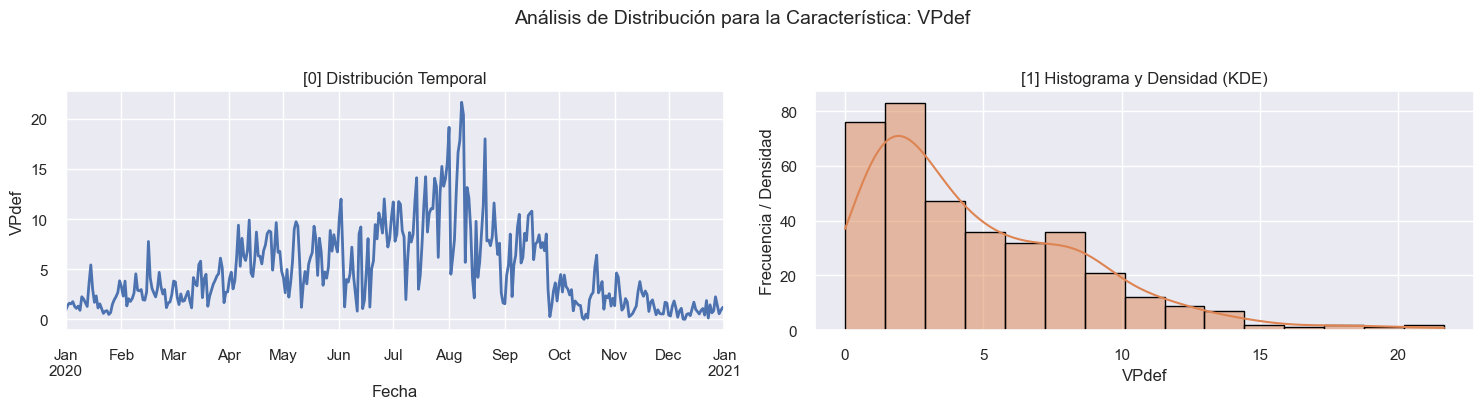

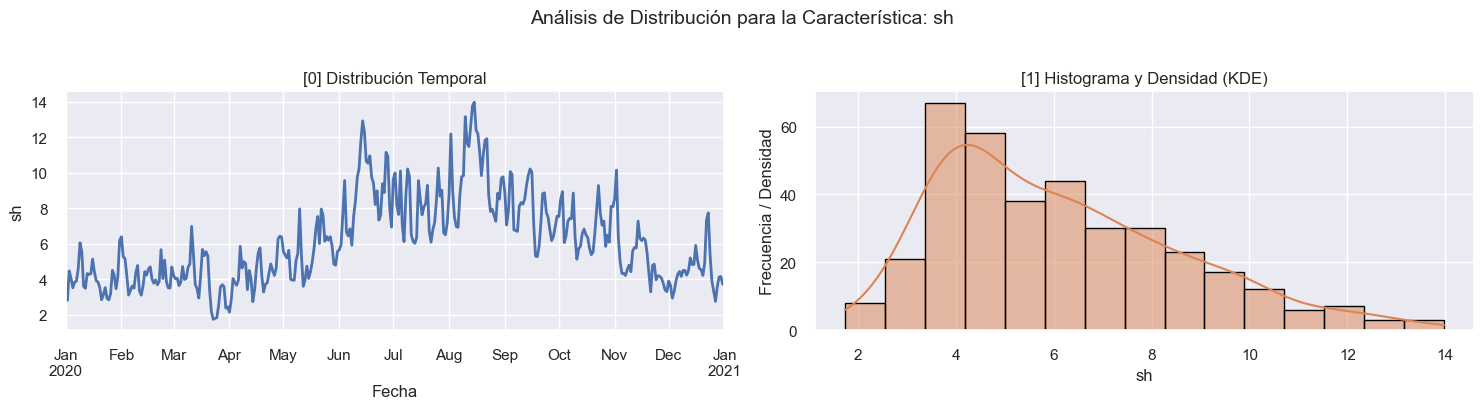

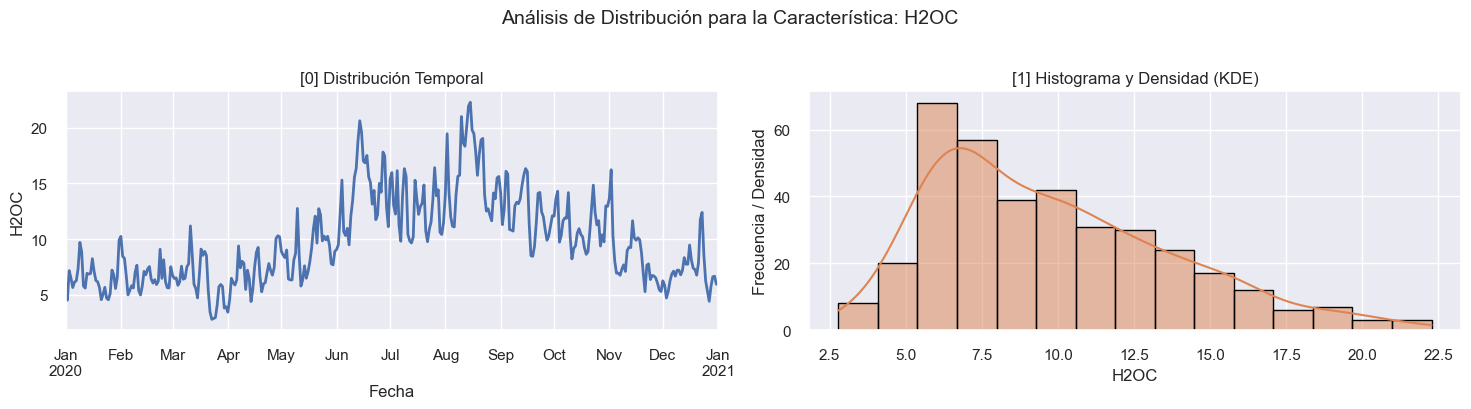

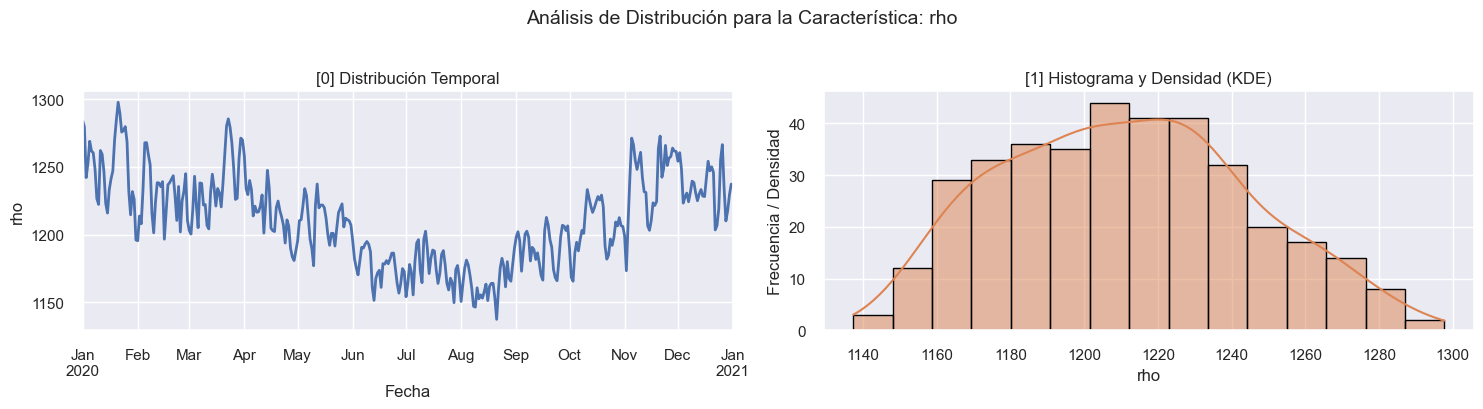

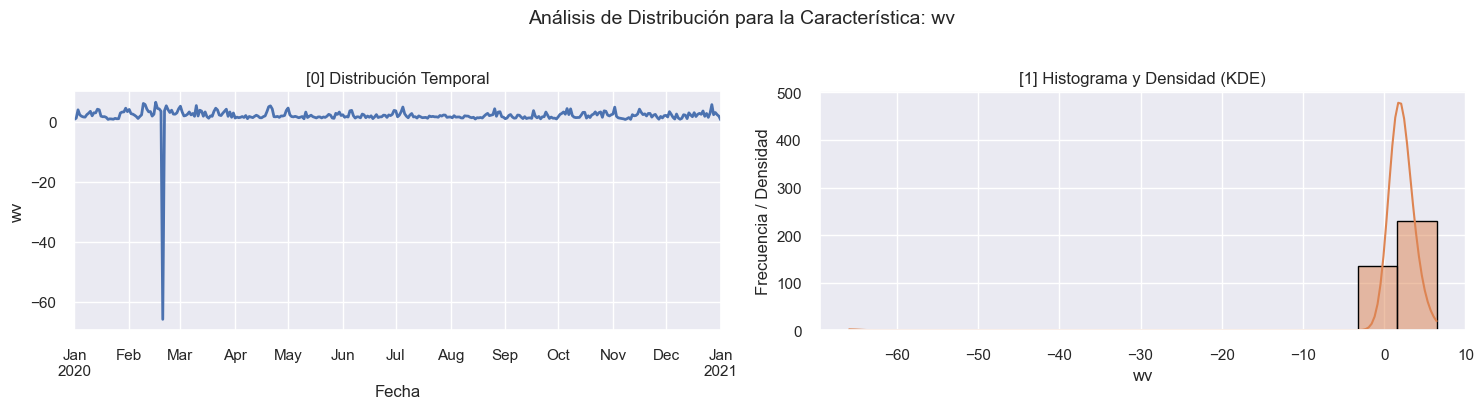

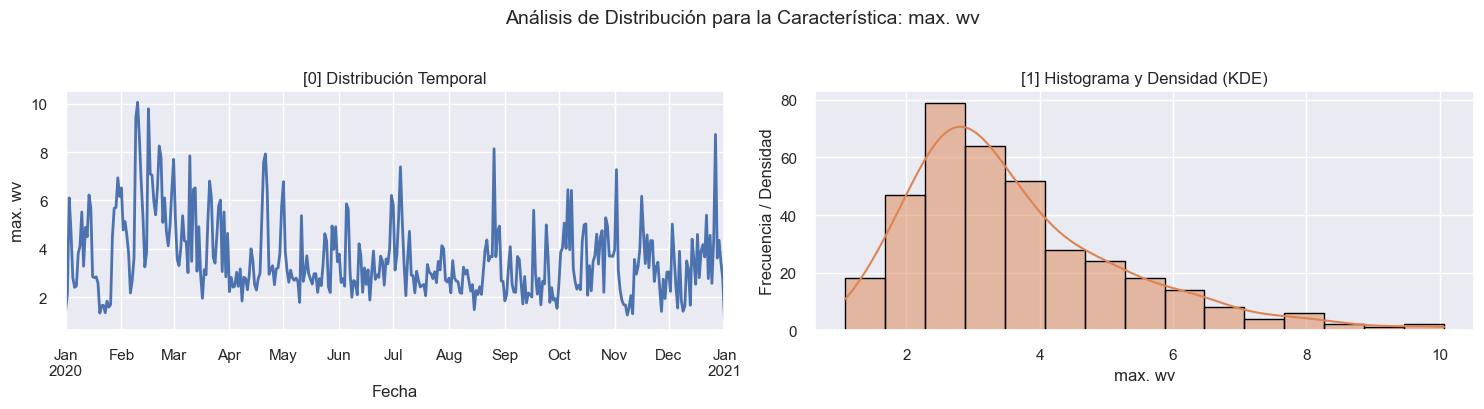

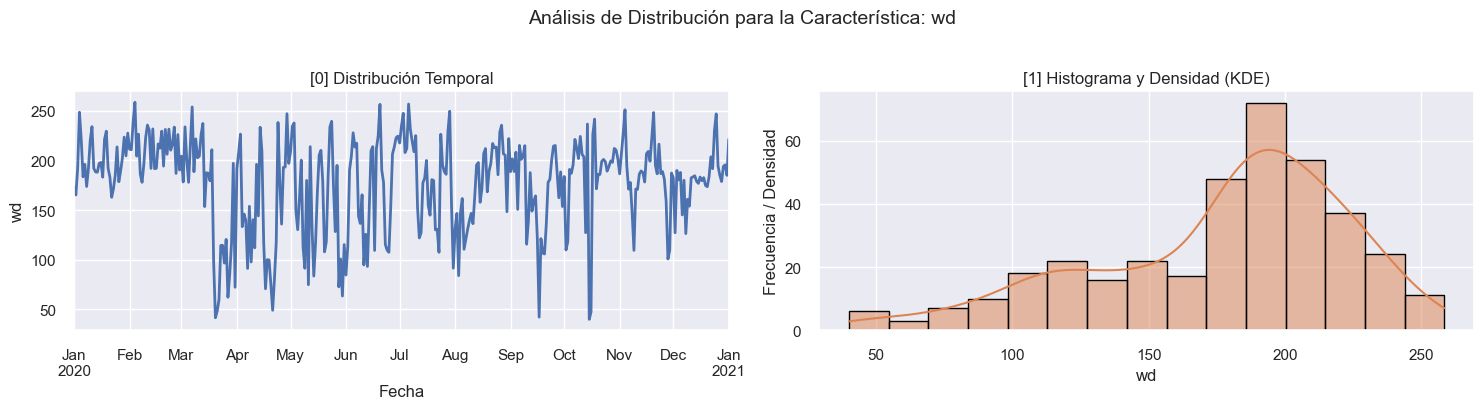

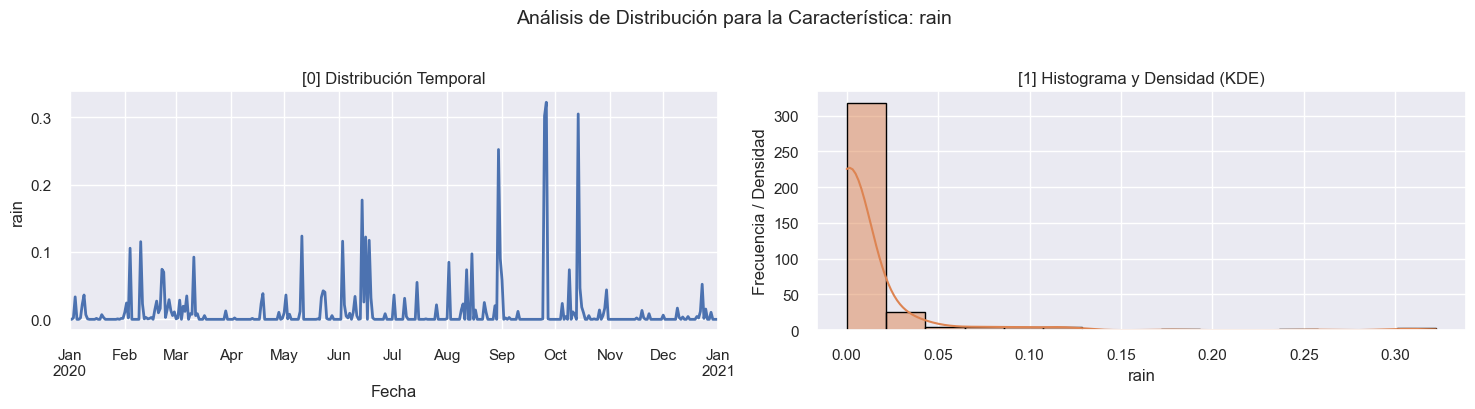

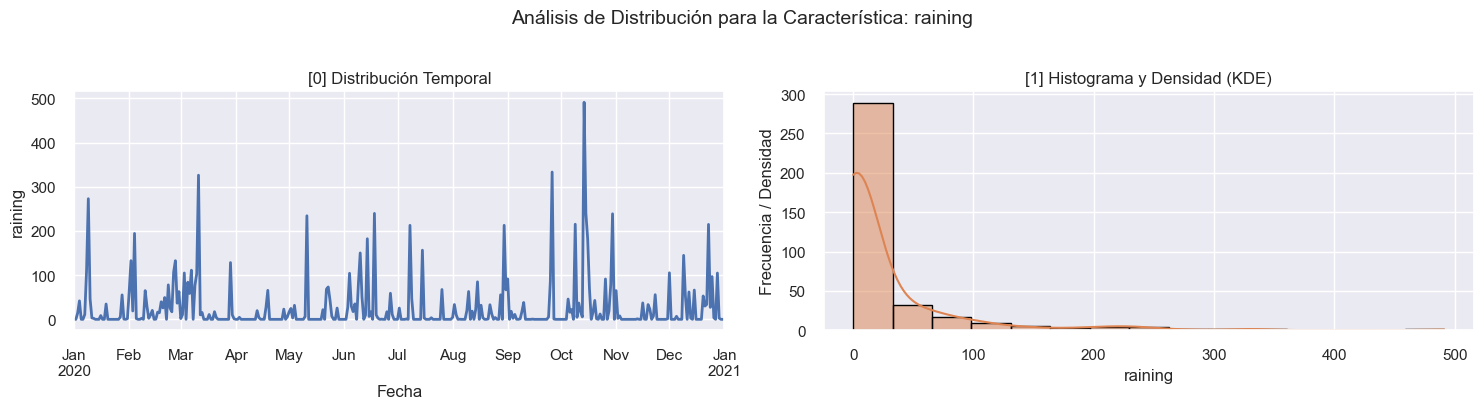

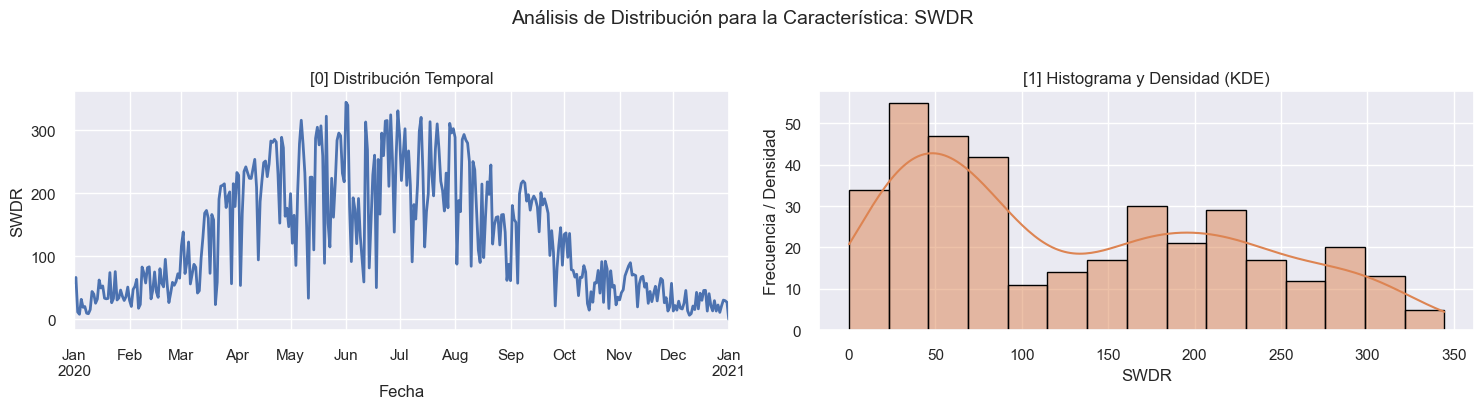

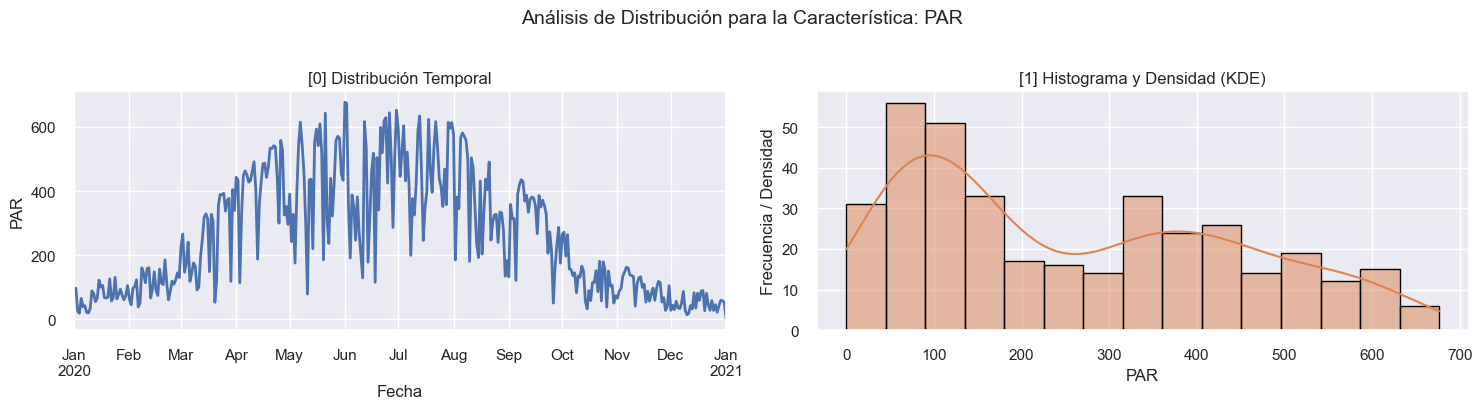

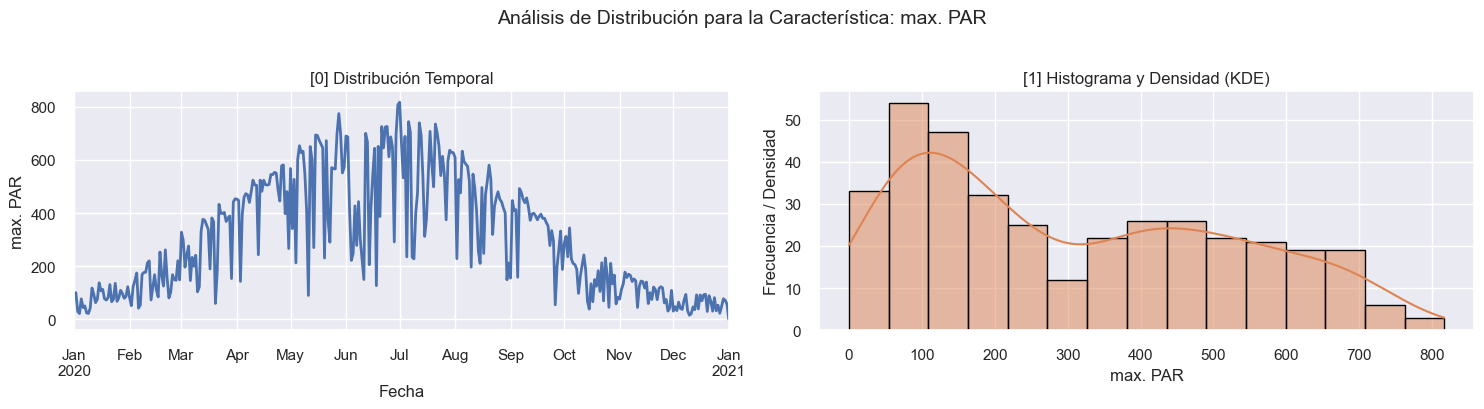

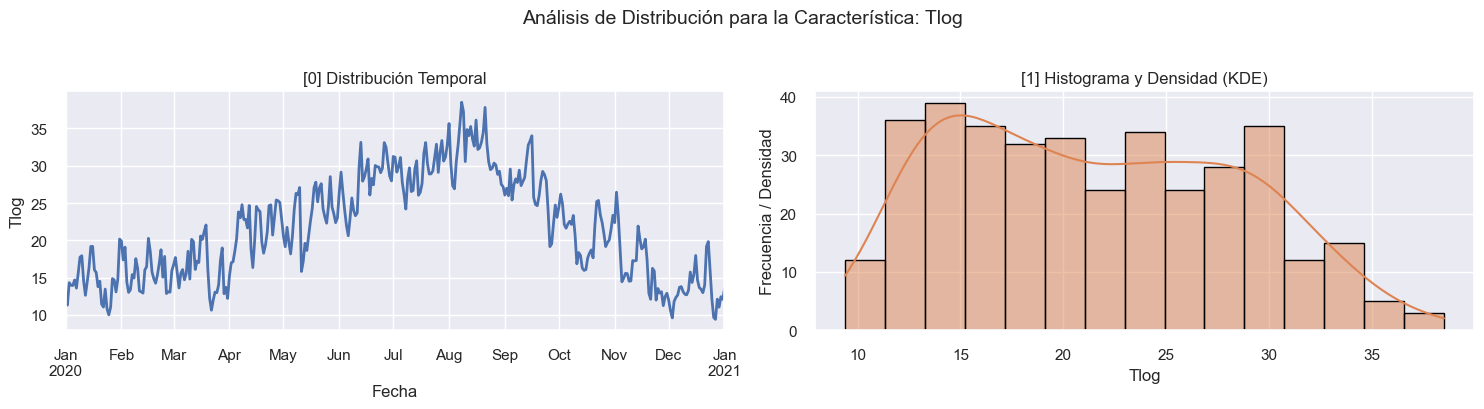

In [ ]:
# Aplicar estilo Seaborn para gráficos más limpios
sns.set_theme(style="darkgrid") 

# 2. CICLO FOR PARA GENERAR SUBPLOTS 
for column in df_daily.columns:
    if column not in ['hour','day','month']:
        # Crear una figura con una fila y dos columnas (axs)
        fig, axs = plt.subplots(1, 2, figsize=(15, 4)) 
        
        # Establecer el título de la fila
        fig.suptitle(f'Análisis de Distribución para la Característica: {column}', fontsize=14, y=1.02)
        
        #  Columna 0: Distribución Temporal (Gráfico de Línea) 
        ax_time = axs[0]
        df_daily[column].plot(ax=ax_time, 
                        title='[0] Distribución Temporal', 
                        linewidth=2, 
                        color=sns.color_palette()[0]) # Usamos el azul primario
        ax_time.set_xlabel('Fecha')
        ax_time.set_ylabel(column)
        
        #  Columna 1: Distribución Probabilística (Histograma con KDE) 
        ax_hist = axs[1]
        # Usamos sns.histplot para incluir la curva de densidad (KDE) junto al histograma.
        sns.histplot(df_daily[column], 
                    ax=ax_hist, 
                    kde=True, 
                    bins=15, 
                    color=sns.color_palette()[1], # Usamos el naranja secundario
                    edgecolor='black') 
        ax_hist.set_title('[1] Histograma y Densidad (KDE)')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frecuencia / Densidad')
        
        # Ajustar el diseño para evitar que los títulos y etiquetas se solapen
        plt.tight_layout()
        plt.show()

## Análisis de Correlación

Se busca establecer la correlación de las distintas variables entre sí y con la variable target, a fin de realizar posteriormente la selección de features con los mejores predictores para entrenar un modelo multivariado.

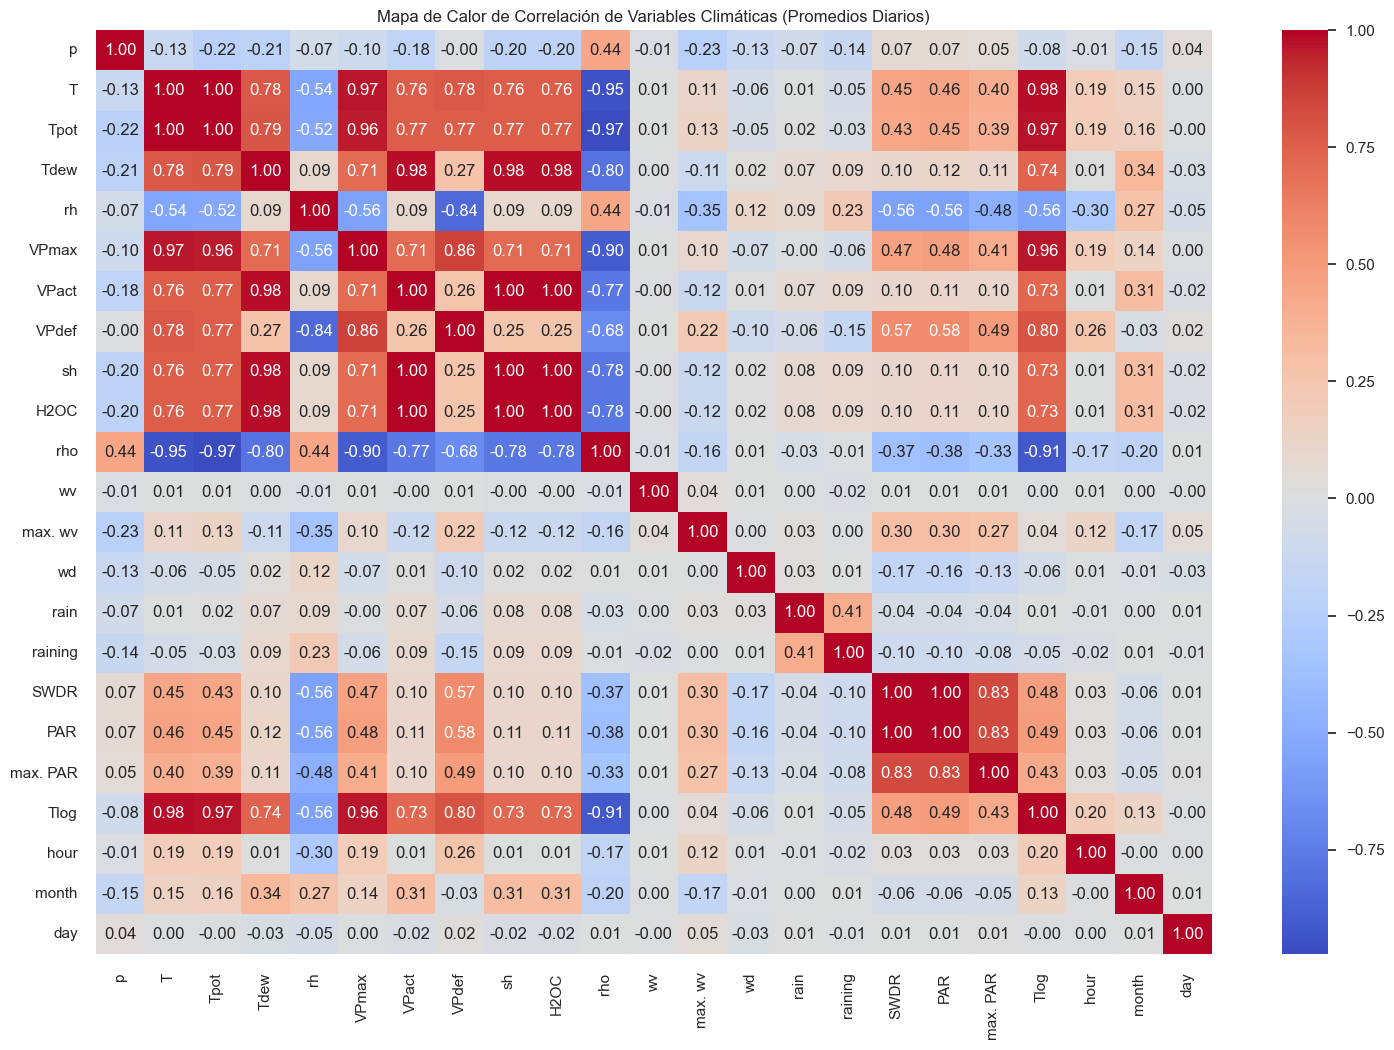

In [58]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Climáticas (Promedios Diarios)')
plt.show()

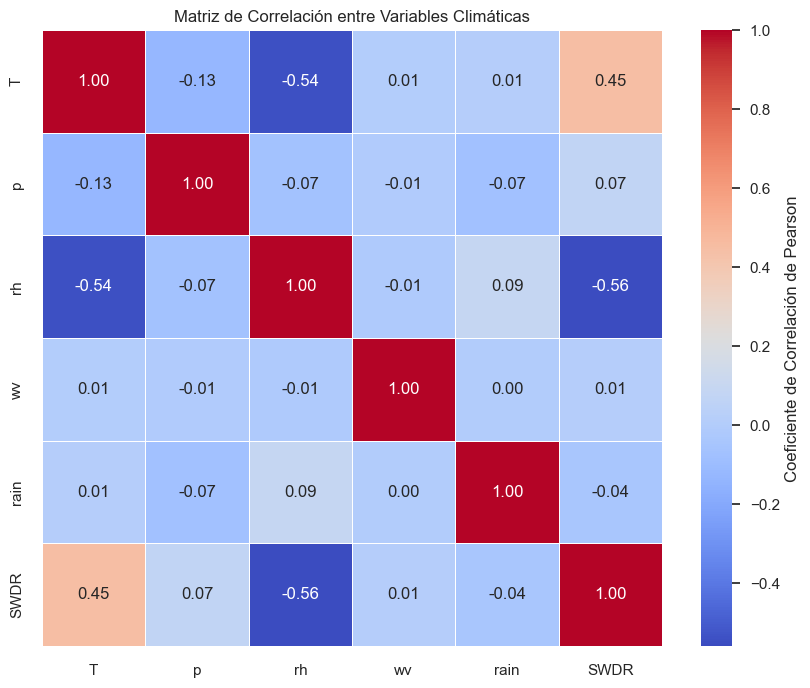

In [ ]:
#  1. Seleccionar las variables y calcular la matriz de correlación 

# Definir la lista de columnas de interés
variables_interes = ['T', 'p', 'rh', 'wv', 'rain', 'SWDR']

# Crear un sub-DataFrame solo con estas columnas
df_subset = df[variables_interes]

# Calcular la matriz de correlación de Pearson
small_cm = df_subset.corr()

#  2. Generar el Mapa de Calor 
plt.figure(figsize=(10, 8))

sns.heatmap(
    small_cm,
    annot=True,     # Muestra el valor del coeficiente de correlación en cada celda
    cmap='coolwarm',# Paleta de color (coolwarm es excelente para mostrar positivos/negativos)
    fmt=".2f",      # Formato con dos decimales
    linewidths=.5,  # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)

plt.title('Matriz de Correlación entre Variables Climáticas')
plt.show()

In [60]:
features_dict = {
    'T': 'Temperatura',
    'p': 'Presión',
    'rh': 'Humedad rel.',
    'wv': 'Viento',
    'rain': 'Lluvia',
    'SWDR': 'Radiación'
    }

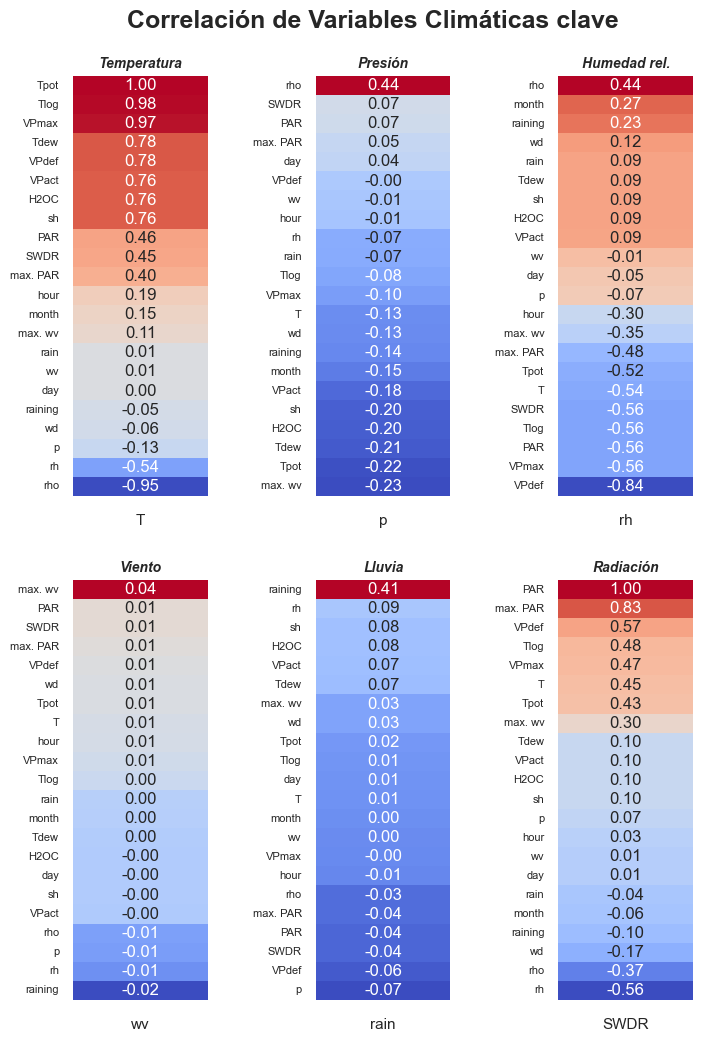

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 12), sharey=False)  
plt.subplots_adjust(wspace=0.8, hspace=0.2) 

# Itera sobre las variables
for i, var in enumerate(variables_interes):
    
    # Selecciona la columna de correlación y ordenarla
    correlation_series = correlation_matrix[var].sort_values(ascending=False)
    
    # Convierte la Serie a un DataFrame de una sola columna (necesario para sns.heatmap)
    correlation_df = correlation_series.to_frame(name=f'{var}')
    
    # Selecciona el subplot actual
    ax_h, ax_v = i // 3 , i % 3  
    ax = axes[ax_h, ax_v]
    
    # Genera el Mapa de Calor en el subplot
    sns.heatmap(
        correlation_df[1:],
        ax=ax,          
        annot=True,     
        cmap='coolwarm',
        fmt=".2f",
        cbar=False,
    )
    
    # Configura Título y Etiquetas
    ax.set_title(
        f'{features_dict[var]}', 
        fontsize=10, 
        fontweight='bold',
        fontstyle='italic'
    ) 
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=8, length=3) 

# Título general de la figura
fig.suptitle('Correlación de Variables Climáticas clave', fontsize=18, fontweight='bold', y=0.935)

plt.show()

#### Observaciones
1. **Features descorrelacionadas:** podemos notar es que la velocidad del viento y la lluvia (cantidad `rain`y duración `raining`) son independiente de las demás variables registradas.
2. **Features poco correlacioandas:**
3. **Features muy correlacioandas:**

- La Radiación Fotosintétitca (`PAR`) tiene correlación perfecta con la Radiación Solar (`SWDR`).
- Lo mismo ocurre con las distintas features de Temperatura (`T`, `Tlog`, `Tpot`).
- La Densidad del aire (`rho`) temperatura tiene alta correlación negativa con la Temperatura (`T`) y positiva con la Presión atmosférica (`p`).
- Esta última presenta también una correlación negativa débil con:
    - Velocidad máxima del viento (`max. wv`),
    - Temperatura potencial (`Tpot`) y de Punto de rocío (`Tdew`),
    - Concentración de vapor de agua (`H2OC`),
    - Humedad específica (`sh`) y
    - Presión de vapor de agua (`Vpact`).


    Humedad relativa (rh), y correlación negativa débil con 


- Además, la presión presenta una correlación débil con la Humedad relativa (rh).

## Estacionalidad de las series

### Temperatura

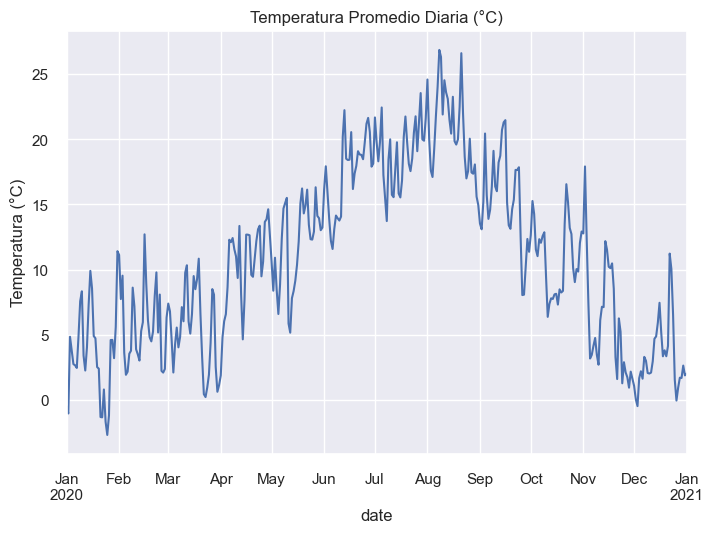

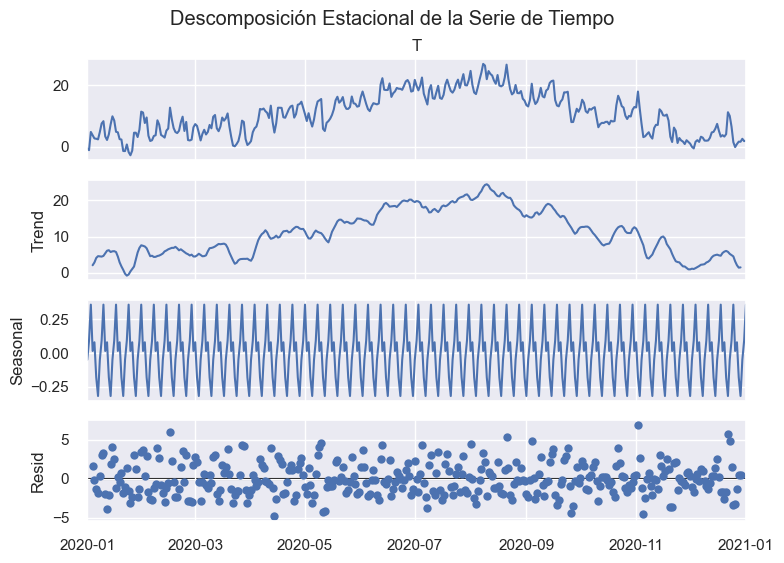

In [70]:
# Visualizar la serie de tiempo diaria
df_daily['T'].plot(title='Temperatura Promedio Diaria (°C)')
plt.ylabel('Temperatura (°C)')
plt.show()

# Descomposición estacional para observar tendencia, estacionalidad y residuos
decomposition = sm.tsa.seasonal_decompose(df_daily['T'], model='additive')
fig = decomposition.plot()
plt.suptitle('Descomposición Estacional de la Serie de Tiempo', y=1.02)
plt.show()

# Ejemplo para la división de datos:
split_index = int(len(df_daily) * 0.8)
train_data = df_daily.iloc[:split_index]
test_data = df_daily.iloc[split_index:]

### Velocidad del viento

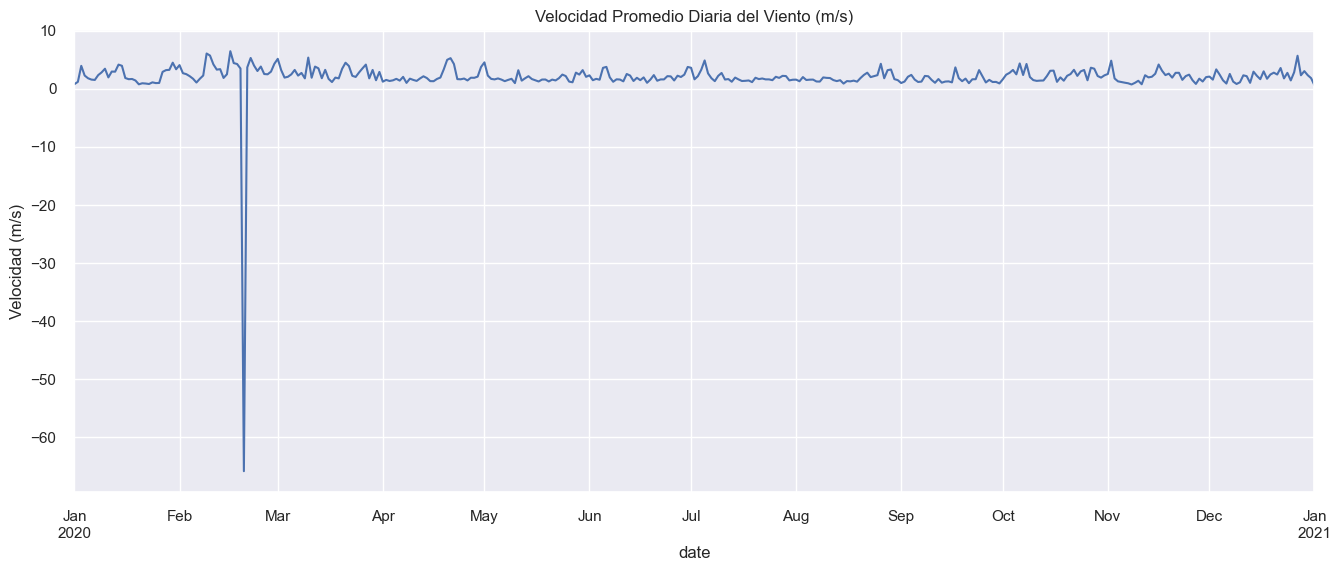

In [71]:
# Gráfico de la serie de tiempo de la velocidad del viento
plt.figure(figsize=(16, 6))
df_daily['wv'].plot(title='Velocidad Promedio Diaria del Viento (m/s)')
plt.ylabel('Velocidad (m/s)')
plt.show()

Se puede ver que hay un error de medición que debe ser removido.

In [72]:
# 1. Calcular la media (mean) de la columna
media_wv = df_daily['wv'].mean()

# 2. Identificar el valor mínimo de la columna
min_wv_value = df_daily['wv'].min()

# 3. Identificar la(s) fila(s) que contienen el valor mínimo
indices_a_imputar = df_daily['wv'] == min_wv_value

# 4. Reemplazar los valores mínimos con la media calculada
df_daily.loc[indices_a_imputar, 'wv'] = media_wv

# Se imprime la media y el nuevo valor mínimo para confirmar la imputación.
print(f"Media calculada de 'wv': {media_wv:.4f}")
print(f"Valor mínimo anterior (para referencia): {min_wv_value:.2f}")
print(f"Nuevo valor mínimo de 'wv' (debería ser mayor o igual a la media): {df_daily['wv'].min():.2f}")

Media calculada de 'wv': 1.9921
Valor mínimo anterior (para referencia): -65.88
Nuevo valor mínimo de 'wv' (debería ser mayor o igual a la media): 0.57


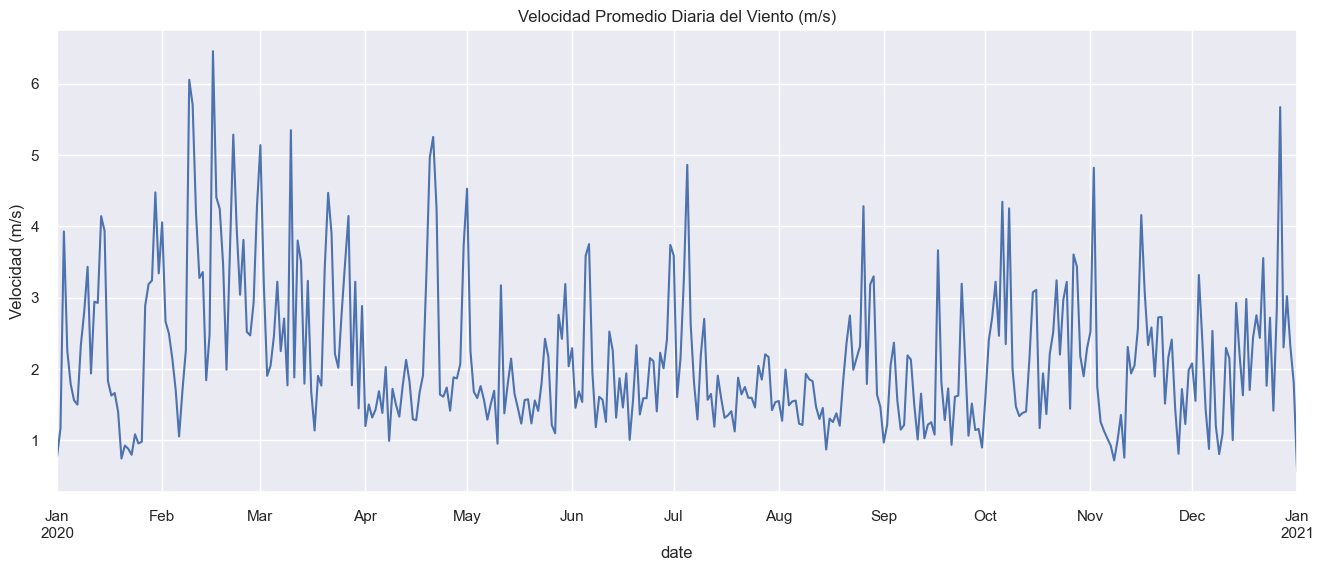

In [73]:
# Gráfico de la serie de tiempo de la velocidad del viento
plt.figure(figsize=(16, 6))
df_daily['wv'].plot(title='Velocidad Promedio Diaria del Viento (m/s)')
plt.ylabel('Velocidad (m/s)')
plt.show()

No parece existir una correlación entre el viento y la estación del año.

### Precipitación

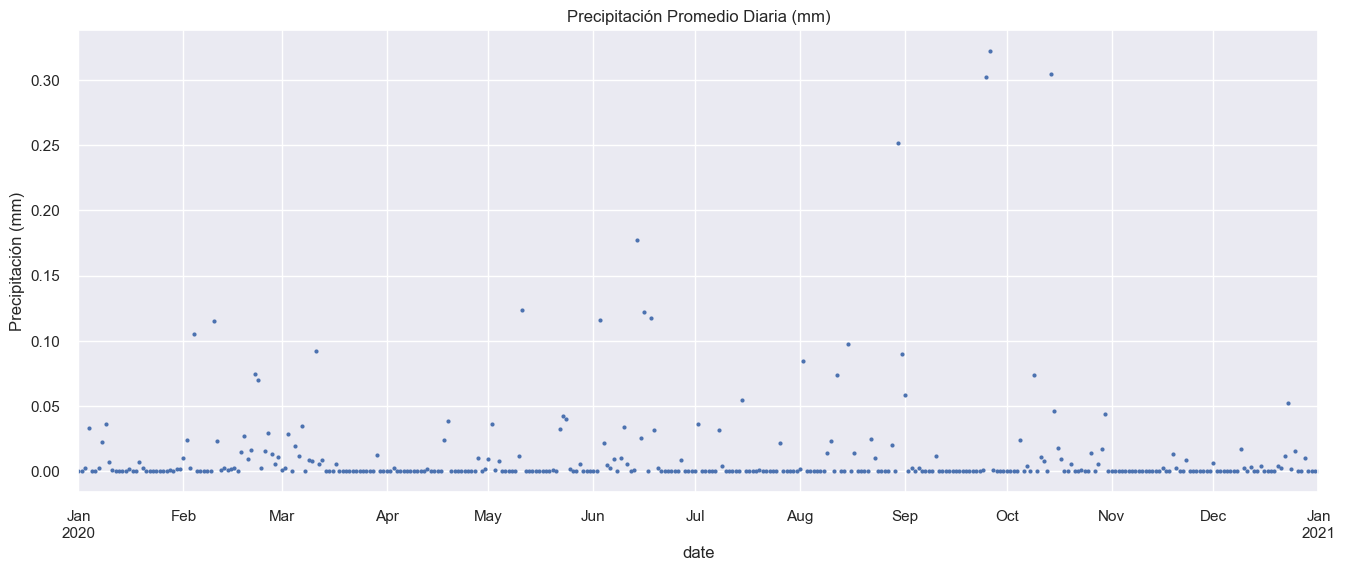

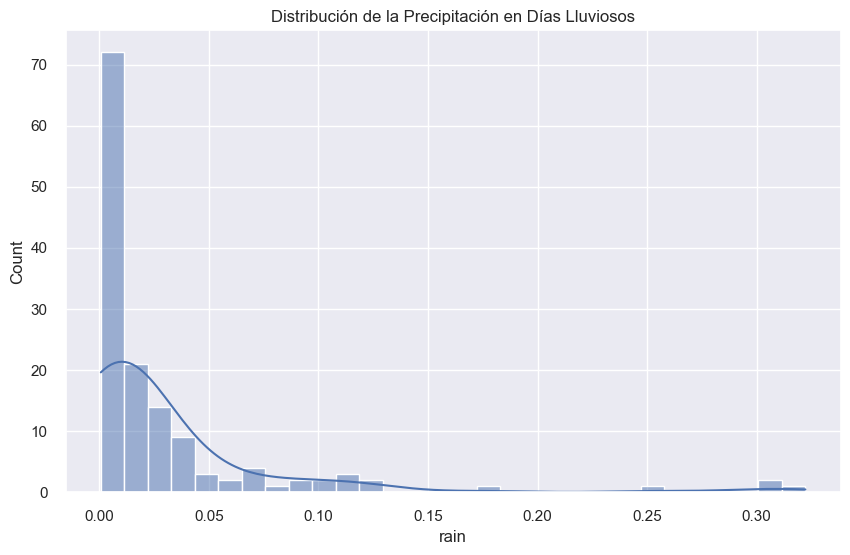

In [74]:
# Gráfico de la serie de tiempo de la precipitación
plt.figure(figsize=(16, 6))
df_daily['rain'].plot(title='Precipitación Promedio Diaria (mm)', style='o', markersize=3)
plt.ylabel('Precipitación (mm)')
plt.show()

# Histograma para ver la distribución (excluyendo los días sin lluvia para una mejor visualización)
plt.figure(figsize=(10, 6))
sns.histplot(df_daily[df_daily['rain'] > 0]['rain'], kde=True)
plt.title('Distribución de la Precipitación en Días Lluviosos')
plt.show()

Se puede observar claramente una estación lluviosa entre los meses de Septiembre y Noviembre, donde se concentra la mayor parte de los mm de lluvia anuales. También hay un incremento de lluvias durante el mes de Junio.

### Radiación Solar

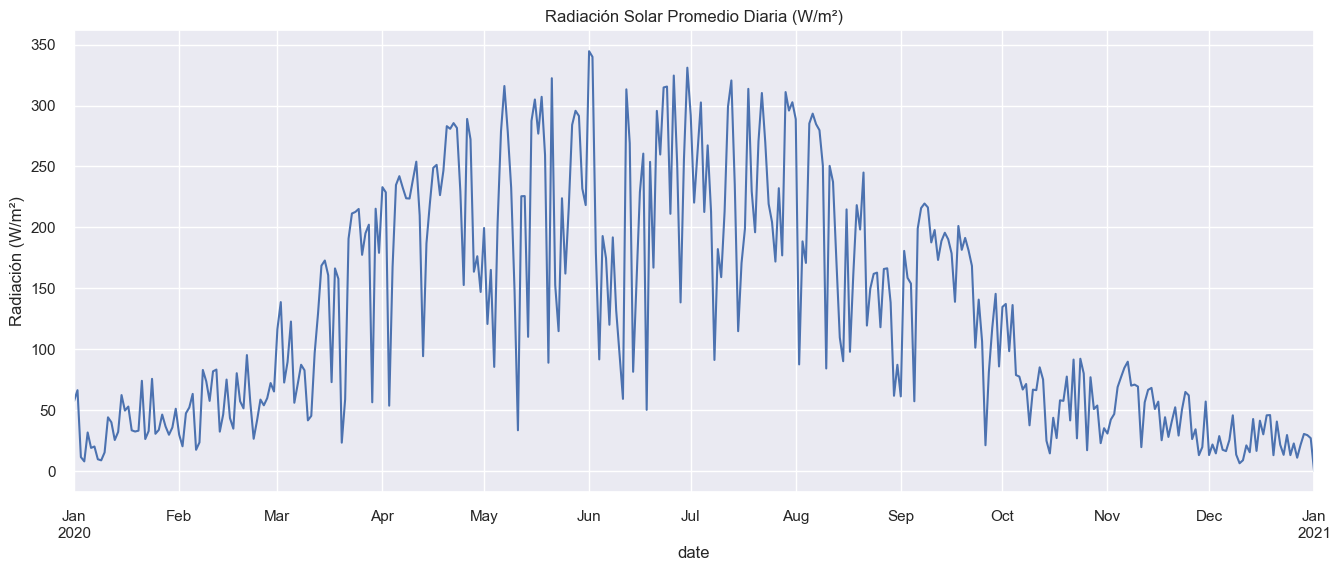

In [75]:
# Gráfico de la serie de tiempo de la radiación solar
plt.figure(figsize=(16, 6))
df_daily['SWDR'].plot(title='Radiación Solar Promedio Diaria (W/m²)')
plt.ylabel('Radiación (W/m²)')
plt.show()

Se ve un marcado aumento de la radiación durante los meses de Primavera y Verano (de Marzo a Octubre).

## Exploración de medias móviles

Se observó que la aplicación de Medias Móviles sobre las series podía aumentar la correlación de estas features con la variable target. Por este motivo, se decide explorar distintas ventanas temporales sobre las features seleccionadas para detectar cuáles aportan una mejora respecto a la feature original.

In [ ]:
# DEFINICIÓN DE VENTANAS Y FEATURES
# Las ventanas se definen en NÚMERO DE PERIODOS (cada periodo es 10 minutos).

# Ventanas específicas: 30 min, 1h, 2h, 4h, 8h
ventanas_general = [3, 6, 12, 24, 48]
features_general = ['SWDR', 'max. PAR', 'max. wv', 'VPdef']

# Ventanas específicas para Presión: 4h, 8h, 12h
ventanas_p = [24, 48, 72]
features_p = ['p']

# DataFrame para almacenar solo las Medias Móviles y el target 'T'
df_mm = df[['T']].copy()

# CÁLCULO DE MEDIAS MÓVILES (MM)
def calcular_mm(df, features, ventanas):
    """Calcula la Media Móvil para las features especificadas con las ventanas dadas."""
    for feature in features:
        for n in ventanas:
            # Crea el nuevo nombre de columna, e.g., 'SWDR_MM_6'
            nueva_col = f'{feature}_MM_{n}'
            df_mm[nueva_col] = df[feature].rolling(window=n, min_periods=1).mean()
    return df_mm

df_mm = calcular_mm(df, features_general, ventanas_general)
df_mm = calcular_mm(df, features_p, ventanas_p)

# Limpiar las primeras filas que pueden contener valores NaN
df_mm = df_mm.dropna()

print(f"Se calcularon {len(df_mm.columns) - 1} nuevas features de MM.")

# CÁLCULO Y ORDENAMIENTO DE LA CORRELACIÓN
# Calcular la matriz de correlación entre todas las MM y la Temperatura (T)
matriz_correlacion_mm = df_mm.corr()

# Extraer la columna de correlación con 'T'
correlacion_T_mm = matriz_correlacion_mm['T'].drop('T')

# Convertir a DataFrame, tomar el valor absoluto y ordenar
resultados_mm = pd.DataFrame(correlacion_T_mm).reset_index()
resultados_mm.columns = ['Feature', 'Correlacion_MM']
resultados_mm['Abs_Correlacion_MM'] = resultados_mm['Correlacion_MM'].abs()

# CÁLCULO DE CORRELACIÓN SIN MM (ORIGINAL)
# Calcular la correlación original entre las features y T
correlacion_original = df[features_general].corrwith(df['T']).to_frame('Correlacion_Original').reset_index()
correlacion_original.columns = ['Feature', 'Correlacion_Original']

# UNIFICACIÓN Y COMPARACIÓN
# Crear un diccionario para mapear la correlación original a las features MM
correlacion_map = correlacion_original.set_index('Feature')['Correlacion_Original'].to_dict()

# Función de ayuda para obtener la correlación original a partir del nombre de la feature MM
def get_original_corr(feature_mm_name):
    # Extrae el nombre original (ej. 'SWDR' de 'SWDR_MM_6')
    for original in features_general:
        if feature_mm_name.startswith(original):
            return correlacion_map.get(original)
    return None

# Aplicar la función a los resultados de MM
resultados_mm['Correlacion_Original'] = resultados_mm['Feature'].apply(get_original_corr)
resultados_mm['Abs_Correlacion_Original'] = resultados_mm['Correlacion_Original'].abs()

# Calcular la mejora absoluta en correlación
resultados_mm['Mejora_Abs'] = resultados_mm['Abs_Correlacion_MM'] - resultados_mm['Abs_Correlacion_Original']

# Ordenar por la correlación absoluta descendente de la MM
predictores_ordenados = resultados_mm.sort_values(by='Abs_Correlacion_MM', ascending=False)

# RESULTADOS FINALES
# Seleccionar las columnas a mostrar
columnas_finales = predictores_ordenados.head(10)[['Feature', 'Abs_Correlacion_MM', 'Abs_Correlacion_Original', 'Mejora_Abs']]


Se calcularon 23 nuevas features de MM.


In [78]:
columnas_finales.sort_values(by='Mejora_Abs',ascending=False)

Feature  Abs_Correlacion_MM  Abs_Correlacion_Original  Mejora_Abs
9   max. PAR_MM_48            0.608910                  0.399064    0.209846
4       SWDR_MM_48            0.613666                  0.448607    0.165060
8   max. PAR_MM_24            0.561570                  0.399064    0.162507
3       SWDR_MM_24            0.567818                  0.448607    0.119211
2       SWDR_MM_12            0.519204                  0.448607    0.070597
15      VPdef_MM_3            0.779211                  0.779616   -0.000405
16      VPdef_MM_6            0.777548                  0.779616   -0.002068
17     VPdef_MM_12            0.771718                  0.779616   -0.007898
18     VPdef_MM_24            0.752119                  0.779616   -0.027497
19     VPdef_MM_48            0.695440                  0.779616   -0.084176

De este análsiis, podemos concluir que es posible obtener una mejor correlación con la variable target Temperatura incorporando las siguientes medias móviles:
1. Para `max. PAR`: de 48 perídos
2. Para `SWDR`: de 48 perídos

Las demás features no se benefician de este proceso de suavizado del ruido.

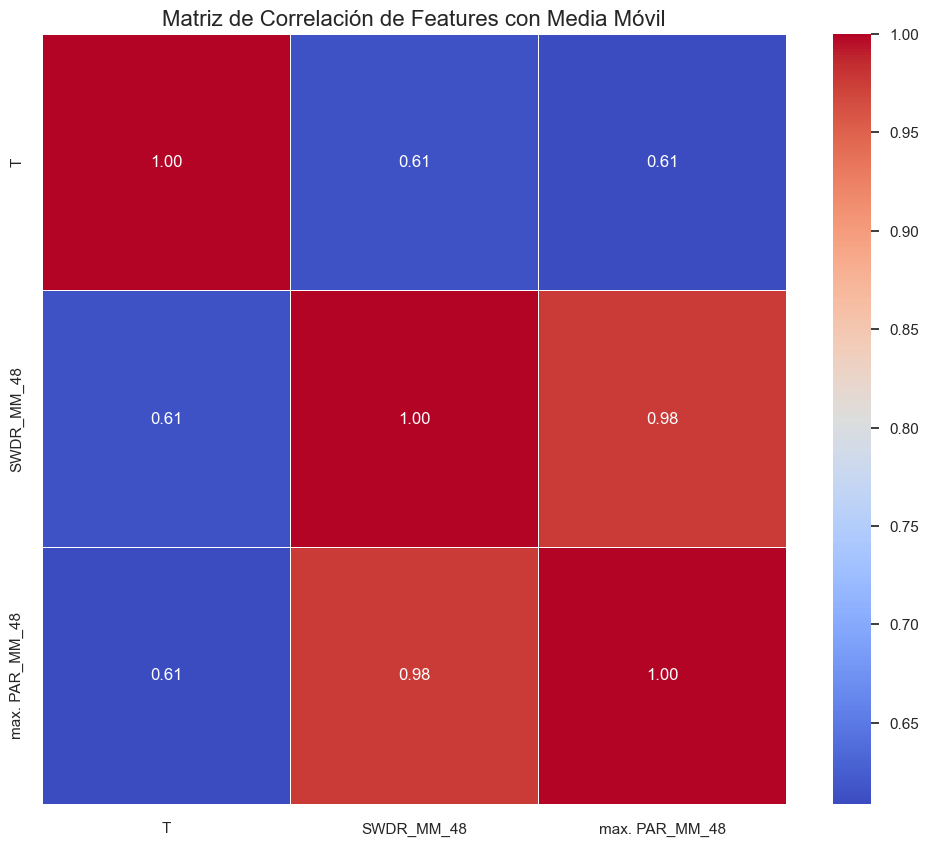

In [88]:
# Usamos la matriz de correlación calculada en las celdas anteriores (matriz_correlacion_mm)
matriz_correlacion_mm = df_mm[['T','SWDR_MM_48','max. PAR_MM_48']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion_mm, 
    annot=True,          # Mostrar los valores de correlación en las celdas
    fmt=".2f",           # Formato con 2 decimales
    cmap='coolwarm',     # Esquema de color para distinguir correlaciones positivas/negativas
    cbar=True,           # Mostrar la barra de color
    linewidths=.5        # Separación entre celdas
)
plt.title('Matriz de Correlación de Features con Media Móvil', fontsize=16)
plt.show()

Podemos observar que `max. PAR` y `SWDR` se encuentran altamente correlacionadas entre si, por lo que seleccionaremos únicamente a `SWDR_MM_48` ya que es la que presenta mayor correlación con target. 

## Prueba de Estacionaridad

In [ ]:
from statsmodels.tsa.stattools import adfuller

# 1. Asume que 'df' es tu DataFrame y 'T' la columna de interés
series = df['T'].dropna() 

# 2. Ejecutar la prueba ADF
result = adfuller(series, autolag='AIC')

# 3. Extraer y mostrar los resultados
print(f'Estadístico de Prueba ADF: {result[0]:.4f}')
print(f'Valor p (p-value): {result[1]:.4f}')
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.4f}')

# 4. Interpretación Formal
p_value = result[1]
critical_value = result[4]['5%'] # Usamos el nivel de significancia del 5%

print("\nCONCLUSIÓN:") 

if p_value <= 0.05 and result[0] < critical_value:
    print("El valor p es <= 0.05 y el Estadístico ADF es menor que el valor crítico.")
    print("✅ RECHAZAMOS H0. La serie es probablemente ESTACIONARIA.")
else:
    print("El valor p es > 0.05 o el Estadístico ADF no es menor que el valor crítico.")
    print("❌ NO RECHAZAMOS H0. La serie NO es estacionaria.")

Estadístico de Prueba ADF: -8.4074
Valor p (p-value): 0.0000
Valores Críticos:
	1%: -3.4305
	5%: -2.8616
	10%: -2.5668

CONCLUSIÓN:
El valor p es <= 0.05 y el Estadístico ADF es menor que el valor crítico.
✅ RECHAZAMOS H0. La serie es probablemente ESTACIONARIA.


## Conclusiones EDA

### 1º) Fuerte Acoplamiento Físico (Correlación Muy Fuerte, $|R| > 0.90$)

Existe una **colinealidad** extrema entre grupos de variables que miden fenómenos físicos estrechamente relacionados. Estas relaciones son esperadas y deben considerarse cuidadosamente para evitar la redundancia en los modelos.

| Relación | Coeficiente (R) | Conclusión |
| :--- | :--- | :--- |
| $\mathbf{T}$ vs $\mathbf{Tpot}$ | $0.995$ | La temperatura del aire y la temperatura potencial están **casi perfectamente acopladas**.
| $\mathbf{T}$ vs $\mathbf{Tlog}$ | $0.982$ | La temperatura del aire y la temperatura logarítmica (o del sensor) tienen una **relación directa y muy fuerte**.
| $\mathbf{T}$ vs $\mathbf{VPmax}$ | $0.968$ | La temperatura y la presión de vapor saturado ($VPmax$) están **fuertemente ligadas**, confirmando que la capacidad del aire para contener vapor de agua es primariamente una función de la temperatura.
| $\mathbf{T}$ vs $\mathbf{rho}$ | $-0.947$ | La temperatura y la densidad del aire ($\rho$) presentan una **correlación negativa muy fuerte**, un principio básico de la termodinámica: el aire más cálido es menos denso.
| $\mathbf{Tdew}$ vs $\mathbf{VPact}$ vs $\mathbf{sh}$ | $\approx 0.97 \text{ a } 0.99$ | El punto de rocío ($Tdew$), la presión de vapor actual ($VPact$), y la humedad específica ($sh$) están **muy fuertemente correlacionadas**, ya que son medidas directas o derivadas del contenido absoluto de vapor de agua.

### 2º) Relaciones Clave de Humedad y Déficit (Correlación Fuerte/Moderada)

* **Déficit de Presión de Vapor ($VPdef$)**:
    * $\mathbf{VPdef}$ tiene una **correlación fuerte y positiva** con la temperatura ($\mathbf{T}$, $R = 0.780$). Al aumentar la temperatura, la capacidad de retención de agua ($VPmax$) crece más rápido que el agua real en el aire ($VPact$), incrementando el déficit.
    * $\mathbf{VPdef}$ tiene una **correlación fuerte y negativa** con la humedad relativa ($\mathbf{rh}$, $R = -0.806$, encontrado en la fila $rh$ vs $VPdef$). Un déficit bajo significa una humedad relativa alta (cercana a la saturación), y viceversa.
* **Humedad Relativa ($rh$)**:
    * Presenta una **correlación moderada y negativa** con la temperatura ($\mathbf{T}$, $R = -0.541$). A mayor temperatura, típicamente menor humedad relativa, reflejando el aumento de $VPmax$.

### 3º) Interacción con la Radiación Solar

Las variables de radiación ($SWDR$ y $PAR$) muestran relaciones consistentes, aunque atenuadas por la inclusión de mediciones nocturnas (donde $SWDR/PAR = 0$).

* **Radiación vs Temperatura**: Se observa una **correlación débil a moderada y positiva** con la temperatura ($\mathbf{T}$, $R_{SWDR} = 0.449$). La radiación solar impulsa el calentamiento del aire.
* **Radiación vs Déficit / Humedad**:
    * **Moderada y positiva** con $\mathbf{VPdef}$ ($R_{SWDR} \approx 0.57$). Más sol implica mayor temperatura y, por ende, mayor déficit de humedad.
    * **Moderada y negativa** con $\mathbf{rh}$ ($R_{SWDR} \approx -0.56$). Los días soleados y cálidos suelen tener menor humedad relativa.

### 4º) Lluvia y Variables Periféricas

* **Lluvia ($rain$ y $raining$)**: Estas variables muestran una **correlación muy débil o insignificante** ($|R| < 0.15$) con la mayoría de las variables meteorológicas principales ($T$, $rh$, $p$), lo cual es común ya que la lluvia es un evento estocástico y su ocurrencia está más ligada a la hora del día y las condiciones sinópticas que al estado termodinámico promedio. La correlación más alta es con la propia **lluvia registrada** ($R_{raining, rain} = 0.409$).